引継ぎ資料 YOLOv8による人数カウント

今回は，YOLOというモデルの概要について説明したいと思います．

1，YOLO(v8)とは

YOLOとは，物体検出モデルの1つであり，画像の中に存在する物体の種類だけでなく，画像内での位置を検出するモデルとなります．

<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F2658998%2Fa008b24d-9e18-8e86-3243-ceaf13577690.jpeg?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=2d423b18161e89e5929917b44ebbd9a4">

YOLOは，物体検出モデルの中でもかなり高速なモデルであり，YOLOのバージョン8，つまり，YOLOv8は，YOLOシリーズの中でも最速のモデルとなります．

<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F1559455%2F45927efb-70e5-f64b-5d2b-47efda49980a.png?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=64f4aa7059ffc6c930b5e4335e25bd8e">

上記の画像において，速度という項目が，一枚の画像の分析にかかる時間を示しております．CPUで，80~130msというのは魅力的です．

YOLOは高度な物体検出モデルにも関わらず，構造自体はシンプルで，ただのCNNになります．畳み込み層によって構成されるシンプルなモデルです．

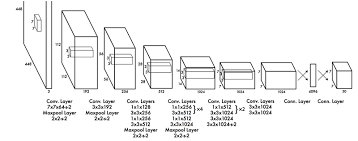

では，簡単にYOLOの仕組みについて説明します．

<img src="https://blog.negativemind.com/wp-content/uploads/2019/02/splitInToGrid.jpg">

まず，画像をいくつかのグリッドセルと呼ばれる形に切り分けます．

<img src="https://blog.negativemind.com/wp-content/uploads/2019/02/combine.jpg">

次に，グリッドセルに分けた画像1つ1つに，B個ずつ，サイズの異なる4角形を用意します．これを，バウンディングボックスといいます．このバウンディングボックスは，大きさ・位置に加えて，信頼度という情報と呼びます．この信頼度とは，バウンディングボックスが写す領域が背景か，物体である確率を示すものとなります．

それと同時に，すべてのグリッドセルに対して，CNNによる画像分類を行い，グリッドセルに写る物体を分類し，領域ごとに，どこに何があるのかをクラスタリングしています．

この2つのデータを組み合わせて，どのバウンディングボックスに何が写っているかを判断することができ，最も信頼度が大きいバウンディングボックスを選べば，物体を写す領域を取得することができます．

このようにして，YOLOはCNNによる分類を行いまくることで，どこに何が写っているかを判断します．また，今回は学習を行いませんが，学習時はバウンディングボックスの大きさも最適化されるようです．さらに，学習データ自体は，人力でバウンディングボックスを指定しないといけないので用意するのはかなり地獄です（経験者）

2，ハンズオン

YOLOは，学習が物凄く大変なので，ある研究機関が予め学習されたモデルを用意してくれてました．今回は，これを使わせていただきます．

では，使用するライブラリをインストールしましょう．

In [1]:
!pip install ultralytics

     ---------------------------------------- 0.0/616.3 kB ? eta -:--:--
     - ----------------------------------- 30.7/616.3 kB 660.6 kB/s eta 0:00:01
     - ----------------------------------- 30.7/616.3 kB 660.6 kB/s eta 0:00:01
     -- ---------------------------------- 41.0/616.3 kB 281.8 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/616.3 kB 281.8 kB/s eta 0:00:03
     ---- -------------------------------- 71.7/616.3 kB 281.8 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/616.3 kB 309.1 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/616.3 kB 309.1 kB/s eta 0:00:02
     ------- ---------------------------- 122.9/616.3 kB 328.4 kB/s eta 0:00:02
     -------- --------------------------- 153.6/616.3 kB 367.6 kB/s eta 0:00:02
     ---------- ------------------------- 174.1/616.3 kB 389.2 kB/s eta 0:00:02
     ----------- ------------------------ 204.8/616.3 kB 415.7 kB/s eta 0:00:01
     ------------- ---------------------- 235.5


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


YOLOを使用するには， ultralyticsというライブラリを使用します．（この名前は研究機関の名前から来てたはず...）

では，YOLOを読み込んで使用してみましょう．次のコードを実行してみてください。

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8l.pt") #.ptファイルに，YOLOの重みデータが入っているので，公式からダウンロードして読み込み．
#一度ダウンロードしたら，勝手にパスを通して，次回からはダウンロードなしで使える

#ネットにある画像のパス
source = "https://ultralytics.com/images/bus.jpg"

#画像のパスとサイズ，分類結果を保存の有無などを引数にとる
results = model.predict(source, save=True, imgsz=320, conf=0.5)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\user\venv\torch\tutorial\aplication\bus.jpg: 320x256 3 persons, 1 bus, 475.6ms
Speed: 2.0ms preprocess, 475.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs\detect\predict2


完了したら，実行結果を確認してみましょう．tutorial\aplication\runs\detect\predictというフォルダが勝手に作られているので中身を確認してください．

YOLOはv8に限りますが，このようにめっちゃ簡単に使用する事ができます．この調子で，他の機能も見てみましょう．

YOLOv8の機能としては，セグメンテーションというものを行うものがあります．これは，物体の形状すらも予測して，物体検出を行う機能のことです．

In [5]:
model = YOLO("yolov8l-seg.pt") #.ptファイルに，YOLOの重みデータが入っているので，公式からダウンロードして読み込み．
#一度ダウンロードしたら，勝手にパスを通して，次回からはダウンロードなしで使える

#ネットにある画像のパス
source = "https://ultralytics.com/images/bus.jpg"

#画像のパスとサイズ，分類結果を保存の有無などを引数にとる
results = model.predict(source, save=True, imgsz=320, conf=0.5)

  0%|          | 0.00/88.1M [00:00<?, ?B/s]


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\user\venv\torch\tutorial\aplication\bus.jpg: 320x256 3 persons, 1 bus, 529.7ms
Speed: 2.0ms preprocess, 529.7ms inference, 8.1ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs\segment\predict


実行が完了すれば，tutorial\aplication\runs\segment\predictが作られていることを確認してください．

3，人数カウントカメラの裏側

ほんの少しですが，YOLOに触れることができたので，「人数カウントカメラ」というものを作ってみましょう．

こちらは，僕が高専祭で展示していたもので，プロコンブースの来場者の合計を数えるために制作しました．

この人数カウントカメラに必要な要素はズバリ一つ，画像の中に人が何人写っているかをYOLOに推論させることです．YOLOの推論の結果を画像以外の形で表示するには，以下のようにします．

In [6]:
source = "https://ultralytics.com/images/bus.jpg"
model = YOLO('yolov8l.pt')

results = model.predict(source,imgsz=320, conf=0.5)

# results[0]から推論結果を取り出す
result_object = results[0]

# バウンディングボックスの座標を取得
bounding_boxes = result_object.boxes.xyxy

# クラスIDを取得
class_ids = result_object.boxes.cls

# クラス名の辞書を取得
class_names_dict = result_object.names

# バウンディングボックスとクラス名を組み合わせて表示
for box, class_id in zip(bounding_boxes, class_ids):
    class_name = class_names_dict[int(class_id)]
    print(f"Box coordinates: {box}, Object: {class_name}")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\Users\user\venv\torch\tutorial\aplication\bus.jpg: 320x256 3 persons, 1 bus, 488.4ms
Speed: 2.0ms preprocess, 488.4ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 256)


Box coordinates: tensor([  9.6144, 229.0865, 803.2972, 738.5203]), Object: bus
Box coordinates: tensor([ 51.1157, 398.3147, 245.5587, 903.2975]), Object: person
Box coordinates: tensor([664.6760, 390.3474, 809.2134, 878.1231]), Object: person
Box coordinates: tensor([221.9324, 407.5237, 344.9286, 860.8000]), Object: person


このコードの中で，「class_ids」というのが，写っている物体の内容を示しています．

In [8]:
for id in class_ids:
    print(id)
    print(class_names_dict[int(id)])

tensor(5.)
bus
tensor(0.)
person
tensor(0.)
person
tensor(0.)
person


ここで，わかるのは，ID=0で示されているのが，人ということであり，画像の中には，3人の人が写っています．

ではこれを応用してみましょう．写っているものがperson，つまり，ID=0のなら，カウントを1プラスするという処理を実行してみます．

In [9]:
count=0

for id in class_ids:
    print(id)
    if int(id)==0:
        count+=1

print(count)

tensor(5.)
tensor(0.)
tensor(0.)
tensor(0.)
3


これで，「一枚の画像に写る」人数を数えることに成功しました．しかし，今回はカメラの映像から，人数を数える必要があるので，カメラの映像の推論を行う必要があります．

以下がそのコードです．

In [11]:
import cv2
from ultralytics import YOLO

#モデルの読み込み(精度は低いが推論がはやい s モデルを使用)
model = YOLO('yolov8s.pt')

#カメラを取得
cap = cv2.VideoCapture(0)

#カメラが映像を取得している間実行
while cap.isOpened():
    
    #映像と，フレーム数をカメラカメラから取得
    success, frame = cap.read()

    if success:

        #ここで推論
        results = model(frame)

        # 推論結果をプロットした画像を生成
        annotated_frame = results[0].plot()

        # それを表示
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # qボタンでループをぬける
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # カメラ映像の獲得に失敗すると，処理を強制終了
        break

#表示しているウィンドウの削除と，カメラの解放
cap.release()
cv2.destroyAllWindows()

  0%|          | 0.00/21.5M [00:00<?, ?B/s]


0: 480x640 1 person, 378.6ms
Speed: 4.0ms preprocess, 378.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 420.1ms
Speed: 4.0ms preprocess, 420.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 378.7ms
Speed: 2.0ms preprocess, 378.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 380.0ms
Speed: 2.0ms preprocess, 380.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 357.0ms
Speed: 2.0ms preprocess, 357.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 409.6ms
Speed: 3.0ms preprocess, 409.6ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 358.6ms
Speed: 3.7ms preprocess, 358.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 398.1ms
Speed: 3.0ms preprocess, 398.1ms inference, 2.0ms postprocess per image at

では，これを先程のコードを用いて改造していきます．

In [1]:
import cv2
from ultralytics import YOLO

#モデルの読み込み(精度は低いが推論がはやい s モデルを使用)
model = YOLO('yolov8s.pt')

#カメラを取得
cap = cv2.VideoCapture(0)

#カメラが映像を取得している間実行
while cap.isOpened():
    
    #画像と，フレーム数をカメラカメラから取得
    success, frame = cap.read()

    if success:

        #1フレームに写る人の数を格納する変数
        count=0

        #ここで推論
        results = model(frame)

        # 推論結果をプロットした画像を生成
        annotated_frame = results[0].plot()

        # それを表示
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # results[0]から推論結果を取り出す
        result_object = results[0]

        # クラスIDを取得
        class_ids = result_object.boxes.cls

        # クラス名の辞書を取得
        class_names_dict = result_object.names

        #すべての被写体のIDに対して処理
        for id in class_ids:
            #もし，ID=0つまりpersonなら実行
            if int(id)==0:
                print(class_names_dict[int(id)])
                count+=1

        #人数を表示
        print(count)

        #リセット
        count=0

        # qボタンでループをぬける
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # カメラ映像の獲得に失敗すると，処理を強制終了
        break

#表示しているウィンドウの削除と，カメラの解放
cap.release()
cv2.destroyAllWindows()


0: 480x640 3 persons, 519.7ms
Speed: 0.0ms preprocess, 519.7ms inference, 19.8ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 518.3ms
Speed: 10.6ms preprocess, 518.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 6 persons, 445.4ms
Speed: 2.0ms preprocess, 445.4ms inference, 17.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 5 persons, 455.3ms
Speed: 1.8ms preprocess, 455.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 429.3ms
Speed: 0.0ms preprocess, 429.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 5 persons, 419.9ms
Speed: 1.4ms preprocess, 419.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 444.0ms
Speed: 0.0ms preprocess, 444.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 5 persons, 435.1ms
Speed: 0.0ms preprocess, 435.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 485.6ms
Speed: 4.8ms preprocess, 485.6ms inference, 7.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 6 persons, 428.6ms
Speed: 3.0ms preprocess, 428.6ms inference, 9.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 5 persons, 457.8ms
Speed: 0.4ms preprocess, 457.8ms inference, 8.9ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 3 persons, 548.0ms
Speed: 8.0ms preprocess, 548.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 2 persons, 480.9ms
Speed: 3.1ms preprocess, 480.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 2 persons, 480.6ms
Speed: 3.6ms preprocess, 480.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 2 persons, 471.3ms
Speed: 5.0ms preprocess, 471.3ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 3 persons, 481.4ms
Speed: 0.0ms preprocess, 481.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 415.8ms
Speed: 2.3ms preprocess, 415.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 445.8ms
Speed: 0.0ms preprocess, 445.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 423.3ms
Speed: 2.3ms preprocess, 423.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 419.6ms
Speed: 3.1ms preprocess, 419.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 404.2ms
Speed: 2.7ms preprocess, 404.2ms inference, 9.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 439.5ms
Speed: 5.0ms preprocess, 439.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 433.1ms
Speed: 3.0ms preprocess, 433.1ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 427.0ms
Speed: 2.7ms preprocess, 427.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 430.4ms
Speed: 0.0ms preprocess, 430.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 416.1ms
Speed: 0.0ms preprocess, 416.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 418.6ms
Speed: 3.0ms preprocess, 418.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 426.9ms
Speed: 4.6ms preprocess, 426.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 451.8ms
Speed: 4.1ms preprocess, 451.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 419.0ms
Speed: 0.0ms preprocess, 419.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 427.7ms
Speed: 3.4ms preprocess, 427.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 423.4ms
Speed: 2.0ms preprocess, 423.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 418.4ms
Speed: 4.4ms preprocess, 418.4ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 442.3ms
Speed: 3.7ms preprocess, 442.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 425.7ms
Speed: 4.5ms preprocess, 425.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 440.4ms
Speed: 5.4ms preprocess, 440.4ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 440.2ms
Speed: 4.5ms preprocess, 440.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 438.1ms
Speed: 3.9ms preprocess, 438.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 396.4ms
Speed: 4.6ms preprocess, 396.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 425.5ms
Speed: 1.4ms preprocess, 425.5ms inference, 6.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 440.4ms
Speed: 0.0ms preprocess, 440.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 408.4ms
Speed: 5.9ms preprocess, 408.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 435.0ms
Speed: 0.0ms preprocess, 435.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 459.3ms
Speed: 4.5ms preprocess, 459.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 422.9ms
Speed: 2.0ms preprocess, 422.9ms inference, 11.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 392.4ms
Speed: 4.5ms preprocess, 392.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 431.4ms
Speed: 2.5ms preprocess, 431.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 437.5ms
Speed: 4.3ms preprocess, 437.5ms inference, 8.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 438.5ms
Speed: 0.0ms preprocess, 438.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 425.1ms
Speed: 2.6ms preprocess, 425.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 442.0ms
Speed: 4.2ms preprocess, 442.0ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 417.5ms
Speed: 0.0ms preprocess, 417.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 2 cell phones, 428.9ms
Speed: 3.7ms preprocess, 428.9ms inference, 6.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 422.9ms
Speed: 3.7ms preprocess, 422.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 415.2ms
Speed: 3.8ms preprocess, 415.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 437.3ms
Speed: 3.6ms preprocess, 437.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 2 cell phones, 418.4ms
Speed: 4.4ms preprocess, 418.4ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 462.7ms
Speed: 3.9ms preprocess, 462.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 394.2ms
Speed: 6.1ms preprocess, 394.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 2 cell phones, 435.5ms
Speed: 1.8ms preprocess, 435.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 437.7ms
Speed: 3.6ms preprocess, 437.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 459.9ms
Speed: 5.9ms preprocess, 459.9ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 412.1ms
Speed: 0.0ms preprocess, 412.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 415.5ms
Speed: 2.8ms preprocess, 415.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 421.7ms
Speed: 3.4ms preprocess, 421.7ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 429.6ms
Speed: 4.6ms preprocess, 429.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 436.5ms
Speed: 4.1ms preprocess, 436.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 chair, 1 cell phone, 404.4ms
Speed: 2.5ms preprocess, 404.4ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 chair, 1 cell phone, 444.4ms
Speed: 5.2ms preprocess, 444.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 427.6ms
Speed: 0.0ms preprocess, 427.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 432.4ms
Speed: 3.4ms preprocess, 432.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 431.9ms
Speed: 2.3ms preprocess, 431.9ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 wine glass, 1 cup, 1 cell phone, 433.5ms
Speed: 4.9ms preprocess, 433.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 wine glass, 428.1ms
Speed: 3.6ms preprocess, 428.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 438.9ms
Speed: 1.0ms preprocess, 438.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 459.2ms
Speed: 3.8ms preprocess, 459.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 book, 431.4ms
Speed: 1.7ms preprocess, 431.4ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 1 cell phone, 428.9ms
Speed: 1.3ms preprocess, 428.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 1 cell phone, 423.0ms
Speed: 2.9ms preprocess, 423.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 448.7ms
Speed: 4.3ms preprocess, 448.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 418.6ms
Speed: 5.6ms preprocess, 418.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 431.4ms
Speed: 1.4ms preprocess, 431.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 460.3ms
Speed: 3.0ms preprocess, 460.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 447.9ms
Speed: 3.4ms preprocess, 447.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 414.0ms
Speed: 1.8ms preprocess, 414.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 440.4ms
Speed: 3.0ms preprocess, 440.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 419.6ms
Speed: 0.0ms preprocess, 419.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 baseball bat, 434.3ms
Speed: 3.7ms preprocess, 434.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 wine glass, 420.3ms
Speed: 3.4ms preprocess, 420.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 2 cups, 439.1ms
Speed: 1.0ms preprocess, 439.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 1 cup, 1 vase, 443.9ms
Speed: 0.0ms preprocess, 443.9ms inference, 5.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 1 cup, 431.8ms
Speed: 3.5ms preprocess, 431.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 1 cup, 426.8ms
Speed: 4.5ms preprocess, 426.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 1 cup, 429.2ms
Speed: 1.9ms preprocess, 429.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 2 cups, 440.3ms
Speed: 3.3ms preprocess, 440.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 1 cup, 424.7ms
Speed: 0.0ms preprocess, 424.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 1 cup, 463.6ms
Speed: 5.8ms preprocess, 463.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 2 cups, 417.4ms
Speed: 4.4ms preprocess, 417.4ms inference, 8.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 2 cups, 440.6ms
Speed: 2.4ms preprocess, 440.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cup, 423.2ms
Speed: 2.1ms preprocess, 423.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cup, 417.6ms
Speed: 5.5ms preprocess, 417.6ms inference, 7.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 1 cup, 422.8ms
Speed: 7.1ms preprocess, 422.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 1 cup, 427.4ms
Speed: 3.0ms preprocess, 427.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 1 cup, 471.0ms
Speed: 2.1ms preprocess, 471.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 1 donut, 439.5ms
Speed: 0.0ms preprocess, 439.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 443.0ms
Speed: 1.9ms preprocess, 443.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 5 persons, 433.6ms
Speed: 2.3ms preprocess, 433.6ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 1 cell phone, 447.4ms
Speed: 5.1ms preprocess, 447.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 1 cell phone, 428.2ms
Speed: 2.9ms preprocess, 428.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 2 persons, 1 cell phone, 445.4ms
Speed: 1.6ms preprocess, 445.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 5 persons, 1 cell phone, 463.5ms
Speed: 3.7ms preprocess, 463.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 2 persons, 1 cell phone, 450.5ms
Speed: 1.0ms preprocess, 450.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 2 persons, 1 cell phone, 418.6ms
Speed: 5.8ms preprocess, 418.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 3 persons, 1 cell phone, 444.6ms
Speed: 2.1ms preprocess, 444.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 429.8ms
Speed: 0.0ms preprocess, 429.8ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 438.7ms
Speed: 3.4ms preprocess, 438.7ms inference, 8.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 437.9ms
Speed: 4.4ms preprocess, 437.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 457.0ms
Speed: 1.5ms preprocess, 457.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 442.2ms
Speed: 0.0ms preprocess, 442.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 429.4ms
Speed: 5.9ms preprocess, 429.4ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 448.1ms
Speed: 3.9ms preprocess, 448.1ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 414.3ms
Speed: 2.4ms preprocess, 414.3ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 449.9ms
Speed: 2.8ms preprocess, 449.9ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 458.0ms
Speed: 3.8ms preprocess, 458.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 1 cell phone, 448.0ms
Speed: 2.0ms preprocess, 448.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 5 persons, 1 cell phone, 435.7ms
Speed: 3.0ms preprocess, 435.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 3 persons, 1 cell phone, 443.6ms
Speed: 5.8ms preprocess, 443.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 432.3ms
Speed: 2.5ms preprocess, 432.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 441.5ms
Speed: 0.0ms preprocess, 441.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 436.3ms
Speed: 1.1ms preprocess, 436.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 448.6ms
Speed: 2.8ms preprocess, 448.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 440.3ms
Speed: 3.7ms preprocess, 440.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 466.4ms
Speed: 2.9ms preprocess, 466.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 446.3ms
Speed: 2.6ms preprocess, 446.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 430.4ms
Speed: 3.4ms preprocess, 430.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 437.6ms
Speed: 3.7ms preprocess, 437.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 454.4ms
Speed: 4.2ms preprocess, 454.4ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 443.6ms
Speed: 5.8ms preprocess, 443.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 467.1ms
Speed: 2.7ms preprocess, 467.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 438.7ms
Speed: 5.1ms preprocess, 438.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 2 cell phones, 422.3ms
Speed: 2.7ms preprocess, 422.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 452.2ms
Speed: 0.0ms preprocess, 452.2ms inference, 5.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 427.8ms
Speed: 0.0ms preprocess, 427.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 5 persons, 1 cell phone, 445.2ms
Speed: 3.2ms preprocess, 445.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 441.6ms
Speed: 4.2ms preprocess, 441.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 455.7ms
Speed: 0.0ms preprocess, 455.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 436.2ms
Speed: 6.3ms preprocess, 436.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 433.7ms
Speed: 2.6ms preprocess, 433.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 1 cell phone, 449.6ms
Speed: 0.0ms preprocess, 449.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 424.0ms
Speed: 3.1ms preprocess, 424.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 433.4ms
Speed: 2.4ms preprocess, 433.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 437.5ms
Speed: 1.9ms preprocess, 437.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 476.4ms
Speed: 4.3ms preprocess, 476.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 430.5ms
Speed: 2.9ms preprocess, 430.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 464.5ms
Speed: 5.0ms preprocess, 464.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 435.2ms
Speed: 3.3ms preprocess, 435.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 438.9ms
Speed: 5.3ms preprocess, 438.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 430.4ms
Speed: 0.0ms preprocess, 430.4ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 501.3ms
Speed: 3.9ms preprocess, 501.3ms inference, 9.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 465.1ms
Speed: 4.1ms preprocess, 465.1ms inference, 6.7ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 472.1ms
Speed: 0.0ms preprocess, 472.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 466.3ms
Speed: 2.1ms preprocess, 466.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 444.8ms
Speed: 3.9ms preprocess, 444.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 481.5ms
Speed: 0.0ms preprocess, 481.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 450.8ms
Speed: 5.6ms preprocess, 450.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 511.7ms
Speed: 6.9ms preprocess, 511.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 461.5ms
Speed: 3.3ms preprocess, 461.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 475.3ms
Speed: 1.2ms preprocess, 475.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 463.6ms
Speed: 0.0ms preprocess, 463.6ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 476.1ms
Speed: 0.0ms preprocess, 476.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 454.8ms
Speed: 3.0ms preprocess, 454.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 494.1ms
Speed: 2.9ms preprocess, 494.1ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 461.4ms
Speed: 0.0ms preprocess, 461.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 477.1ms
Speed: 4.4ms preprocess, 477.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 463.2ms
Speed: 0.0ms preprocess, 463.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 464.9ms
Speed: 4.8ms preprocess, 464.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 cell phone, 462.4ms
Speed: 3.0ms preprocess, 462.4ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 475.3ms
Speed: 4.4ms preprocess, 475.3ms inference, 6.7ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 480.5ms
Speed: 0.0ms preprocess, 480.5ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 remote, 467.1ms
Speed: 4.8ms preprocess, 467.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 444.4ms
Speed: 2.5ms preprocess, 444.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 480.4ms
Speed: 0.0ms preprocess, 480.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 471.0ms
Speed: 3.0ms preprocess, 471.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 484.4ms
Speed: 4.4ms preprocess, 484.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 5 persons, 483.0ms
Speed: 1.0ms preprocess, 483.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 3 persons, 470.6ms
Speed: 4.5ms preprocess, 470.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 5 persons, 449.7ms
Speed: 3.1ms preprocess, 449.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 6 persons, 457.1ms
Speed: 3.1ms preprocess, 457.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 6 persons, 445.3ms
Speed: 1.5ms preprocess, 445.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 6 persons, 458.5ms
Speed: 5.4ms preprocess, 458.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 6 persons, 457.2ms
Speed: 3.1ms preprocess, 457.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 6 persons, 509.8ms
Speed: 3.0ms preprocess, 509.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 5 persons, 455.0ms
Speed: 4.1ms preprocess, 455.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 5 persons, 474.0ms
Speed: 4.2ms preprocess, 474.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 6 persons, 465.1ms
Speed: 0.0ms preprocess, 465.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 6 persons, 463.4ms
Speed: 3.0ms preprocess, 463.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 7 persons, 450.6ms
Speed: 4.6ms preprocess, 450.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
person
7


0: 480x640 6 persons, 482.0ms
Speed: 4.3ms preprocess, 482.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 5 persons, 503.7ms
Speed: 2.2ms preprocess, 503.7ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 5 persons, 489.4ms
Speed: 0.0ms preprocess, 489.4ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 454.4ms
Speed: 4.4ms preprocess, 454.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 6 persons, 470.5ms
Speed: 0.0ms preprocess, 470.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
person
6


0: 480x640 5 persons, 469.0ms
Speed: 0.0ms preprocess, 469.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
person
5


0: 480x640 4 persons, 492.3ms
Speed: 3.0ms preprocess, 492.3ms inference, 5.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 489.2ms
Speed: 0.0ms preprocess, 489.2ms inference, 9.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 491.7ms
Speed: 5.0ms preprocess, 491.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 4 persons, 460.1ms
Speed: 3.3ms preprocess, 460.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 4 persons, 1 tie, 473.6ms
Speed: 3.2ms preprocess, 473.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
person
4


0: 480x640 3 persons, 452.3ms
Speed: 3.7ms preprocess, 452.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 1 tv, 462.9ms
Speed: 3.1ms preprocess, 462.9ms inference, 8.3ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 463.2ms
Speed: 5.3ms preprocess, 463.2ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 493.6ms
Speed: 1.0ms preprocess, 493.6ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 2 persons, 478.7ms
Speed: 0.0ms preprocess, 478.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 3 persons, 479.8ms
Speed: 2.6ms preprocess, 479.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 460.3ms
Speed: 3.3ms preprocess, 460.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 3 persons, 471.6ms
Speed: 4.5ms preprocess, 471.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
person
3


0: 480x640 2 persons, 463.3ms
Speed: 1.5ms preprocess, 463.3ms inference, 14.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 2 persons, 559.5ms
Speed: 0.0ms preprocess, 559.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 2 persons, 472.1ms
Speed: 3.0ms preprocess, 472.1ms inference, 10.5ms postprocess per image at shape (1, 3, 480, 640)



person
person
2


0: 480x640 2 persons, 507.0ms
Speed: 2.2ms preprocess, 507.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


person
person
2


ログを見てみると，「person 1」みたいなのが表示されていると思います．それならば成功です．

これで，ある1フレームにおける人数のカウントは実装完了です．しかし，人数カウントカメラは，来場者の合計（つまり，今まで何人入ってきたか）を算出するカメラなので，これだけでは不十分です．

来場者の合計を求めるには，前回のフレームに写る人数に対して，カメラに写る人が何人増えたかを記録して，そこから求める必要があります．

言葉では伝わりにくいので，次のコードで示します．

In [7]:
import cv2
from ultralytics import YOLO

#モデルの読み込み(精度は低いが推論がはやい s モデルを使用)
model = YOLO('yolov8s.pt')

#カメラを取得
cap = cv2.VideoCapture(0)

#今まで写って来た人の合計
sum=0

#前回のフレームに写っていた人の数を格納する変数
before_count=0

#カメラが映像を取得している間実行
while cap.isOpened():
    
    #画像と，フレーム数をカメラカメラから取得
    success, frame = cap.read()

    if success:

        #1フレームに写る人の数を格納する変数
        count=0

        #ここで推論
        results = model(frame)

        # 推論結果をプロットした画像を生成
        annotated_frame = results[0].plot() #処理が重いならここを消してもよい

        # それを表示
        cv2.imshow("YOLOv8 Inference", annotated_frame) #処理が重いならここを消してもよい

        # results[0]から推論結果を取り出す
        result_object = results[0]

        # クラスIDを取得
        class_ids = result_object.boxes.cls

        # クラス名の辞書を取得
        class_names_dict = result_object.names

        #すべての被写体のIDに対して処理
        for id in class_ids:
            #もし，ID=0つまりpersonなら実行
            if int(id)==0:
                print(class_names_dict[int(id)])
                count+=1
        
        #もし，写る人数が現在から増えたら，それが訪れた人の差分となる
        if count>before_count:
            sum+=count-before_count

        #推論が終われば，「今のカウント」は，「前回のカウント」に変わる
        #「今日」という日も明日には「昨日」になるように（？）
        before_count=count

        #今のフレームに写る人数を表示
        print(count)

        #今までの人数の合計を表示
        print("sum:",sum)

        #リセット
        count=0

        #処理が重いならここを消す
        ###########################################
        # qボタンでループをぬける
        if cv2.waitKey(1) & 0xFF == ord("q"): 
            break 
        else: 
        # カメラ映像の獲得に失敗すると，処理を強制終了
            break 
        ###########################################

#表示しているウィンドウの削除と，カメラの解放
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 person, 393.9ms
Speed: 3.0ms preprocess, 393.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 395.6ms
Speed: 3.0ms preprocess, 395.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 423.6ms
Speed: 3.0ms preprocess, 423.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 418.3ms
Speed: 3.0ms preprocess, 418.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 462.5ms
Speed: 3.7ms preprocess, 462.5ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 398.6ms
Speed: 2.1ms preprocess, 398.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 391.1ms
Speed: 3.5ms preprocess, 391.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 374.3ms
Speed: 3.2ms preprocess, 374.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 1 person, 418.5ms
Speed: 3.0ms preprocess, 418.5ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)



person
1
1


0: 480x640 (no detections), 452.9ms
Speed: 3.0ms preprocess, 452.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



0
1


0: 480x640 (no detections), 462.9ms
Speed: 4.0ms preprocess, 462.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



0
1


0: 480x640 2 persons, 506.9ms
Speed: 2.0ms preprocess, 506.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
3


0: 480x640 2 persons, 423.7ms
Speed: 4.0ms preprocess, 423.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
3


0: 480x640 2 persons, 426.0ms
Speed: 3.0ms preprocess, 426.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
3


0: 480x640 2 persons, 426.4ms
Speed: 3.0ms preprocess, 426.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
3


0: 480x640 1 person, 431.0ms
Speed: 5.0ms preprocess, 431.0ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)



person
1
3


0: 480x640 1 person, 419.2ms
Speed: 1.8ms preprocess, 419.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
3


0: 480x640 (no detections), 408.5ms
Speed: 3.0ms preprocess, 408.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)



0
3


0: 480x640 (no detections), 475.2ms
Speed: 3.0ms preprocess, 475.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)



0
3


0: 480x640 1 person, 664.4ms
Speed: 7.0ms preprocess, 664.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 534.3ms
Speed: 8.0ms preprocess, 534.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 455.2ms
Speed: 3.0ms preprocess, 455.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 439.2ms
Speed: 2.8ms preprocess, 439.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 432.9ms
Speed: 3.0ms preprocess, 432.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 433.9ms
Speed: 3.0ms preprocess, 433.9ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 497.1ms
Speed: 2.0ms preprocess, 497.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 578.4ms
Speed: 7.0ms preprocess, 578.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 439.5ms
Speed: 2.3ms preprocess, 439.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 439.2ms
Speed: 3.0ms preprocess, 439.2ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 438.4ms
Speed: 3.0ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 449.7ms
Speed: 3.0ms preprocess, 449.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 433.8ms
Speed: 3.0ms preprocess, 433.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 426.9ms
Speed: 3.0ms preprocess, 426.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 528.3ms
Speed: 3.0ms preprocess, 528.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 439.9ms
Speed: 3.0ms preprocess, 439.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 435.9ms
Speed: 4.0ms preprocess, 435.9ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 421.5ms
Speed: 3.0ms preprocess, 421.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 439.6ms
Speed: 3.0ms preprocess, 439.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 419.5ms
Speed: 4.0ms preprocess, 419.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 418.4ms
Speed: 3.0ms preprocess, 418.4ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 656.7ms
Speed: 3.0ms preprocess, 656.7ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 609.5ms
Speed: 9.3ms preprocess, 609.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 460.7ms
Speed: 3.0ms preprocess, 460.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 1 tie, 449.4ms
Speed: 4.0ms preprocess, 449.4ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 1 person, 1 tie, 437.4ms
Speed: 3.4ms preprocess, 437.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
4


0: 480x640 2 persons, 442.8ms
Speed: 2.0ms preprocess, 442.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
5


0: 480x640 2 persons, 456.9ms
Speed: 5.5ms preprocess, 456.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
5


0: 480x640 2 persons, 544.4ms
Speed: 4.0ms preprocess, 544.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
5


0: 480x640 2 persons, 421.3ms
Speed: 2.0ms preprocess, 421.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
5


0: 480x640 1 person, 432.9ms
Speed: 4.0ms preprocess, 432.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 429.0ms
Speed: 3.0ms preprocess, 429.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 463.5ms
Speed: 2.6ms preprocess, 463.5ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 507.1ms
Speed: 2.6ms preprocess, 507.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 514.8ms
Speed: 3.5ms preprocess, 514.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 539.8ms
Speed: 89.5ms preprocess, 539.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 511.6ms
Speed: 3.6ms preprocess, 511.6ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 520.0ms
Speed: 3.0ms preprocess, 520.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 602.4ms
Speed: 4.0ms preprocess, 602.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 638.2ms
Speed: 3.0ms preprocess, 638.2ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 732.1ms
Speed: 3.0ms preprocess, 732.1ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 601.8ms
Speed: 5.0ms preprocess, 601.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 586.4ms
Speed: 6.0ms preprocess, 586.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 562.2ms
Speed: 5.0ms preprocess, 562.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 595.2ms
Speed: 4.1ms preprocess, 595.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 1 person, 804.6ms
Speed: 12.0ms preprocess, 804.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
5


0: 480x640 2 persons, 731.3ms
Speed: 3.0ms preprocess, 731.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
person
2
6


0: 480x640 1 person, 763.2ms
Speed: 5.0ms preprocess, 763.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 600.8ms
Speed: 3.0ms preprocess, 600.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 762.9ms
Speed: 4.1ms preprocess, 762.9ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 677.6ms
Speed: 4.0ms preprocess, 677.6ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 764.5ms
Speed: 31.7ms preprocess, 764.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 649.7ms
Speed: 5.0ms preprocess, 649.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 610.1ms
Speed: 4.0ms preprocess, 610.1ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 674.2ms
Speed: 4.0ms preprocess, 674.2ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 562.5ms
Speed: 4.0ms preprocess, 562.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 535.8ms
Speed: 3.2ms preprocess, 535.8ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 532.4ms
Speed: 3.0ms preprocess, 532.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 519.2ms
Speed: 3.0ms preprocess, 519.2ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 525.5ms
Speed: 3.0ms preprocess, 525.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 513.3ms
Speed: 4.0ms preprocess, 513.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 499.5ms
Speed: 2.0ms preprocess, 499.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 587.8ms
Speed: 3.0ms preprocess, 587.8ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 469.8ms
Speed: 2.0ms preprocess, 469.8ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 438.3ms
Speed: 3.0ms preprocess, 438.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 435.9ms
Speed: 3.0ms preprocess, 435.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


0: 480x640 1 person, 447.6ms
Speed: 5.0ms preprocess, 447.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



person
1
6


KeyboardInterrupt: 

カメラの前から消えたり，写ったりしてみてください．「sum ○○」のカウントが増えていると思います．これで，成功です．

これで，講習は終了となります．お疲れ様でした．